# Premiers pas en différences finies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Définition du problème
On se fixe une discrétisation uniforme sur un domaine $[x_0,x_1]$. Notre solution initiale sera un créneau, c'est-à-dire elle est définie selon :
$u_0 = 0$ si $x\leq x_{s,1}$, $u_0 = 0.1$ si $x_{s,1}<x<x_{s,2}$ et $u_0 = 0$ si $x\geq x_{s,2}$


In [2]:
def define_grid(nb_discr,x0=0.,x1=1.):
    x = np.linspace(x0,x1,nb_discr)
    return x

def define_rectangle(x,xs1=0.1,xs2=0.4):
    u0 = 0.1*np.ones_like(x)
    u0[x<=xs1] = 0.
    u0[x>=xs2] = 0.
    return u0

## Schéma décentré amont du 1er ordre
En python `u[-1]` correspond au point à l'autre bout du domaine. Ainsi à l'indice 0, on va chercher la valeur de l'autre côté du domaine : c'est une **condition de périodicité** comme si notre domaine est infini.

In [3]:
def uds(u,x):
    dudx = np.zeros_like(u)
    dx = x[1]-x[0]
    for i in range(1,u.size):
        dudx[i] = (u[i]-u[i-1])/dx
    dudx[0] = (u[0]-u[-2])/dx
    return dudx

## Schéma centré du 2e ordre
À nouveau on utilise les propriétés des indices en python qui permet de rendre le problème périodique en espace.

In [4]:
def cds(u,x):
    dudx = np.zeros_like(u)
    npts = u.size
    dx = x[1]-x[0]
    for i in range(0,npts-1):
        dudx[i] = (u[i+1]-u[i-1])/(2.*dx)
    dudx[-1] = (u[1]-u[-2])/(2.*dx)
    return dudx

## Schéma d'Euler explicite

In [5]:
def upwind_Euler(u,dt,a,dudx):
    un = u
    unp1 = un-a*dt*dudx
    return unp1

## Premiers essais avec le créneau
On commence une discrétisation sur 20 points, puis on pourra augmenter cette valeur. On se fixe une valeur du pas de temps arbitraire, mettons que l'on veut que notre signal traverse le domaine en 100 itérations. 

In [6]:
a = 1.
x0 = 0.
x1 = 1.
xs1 = 0.4
xs2 = 0.6
L = x1-x0
dt = L / 100
nb_discr = 20

x = define_grid(nb_discr,x0,x1)
dx = x[1]-x[0]
u0 = define_rectangle(x,xs1,xs2)


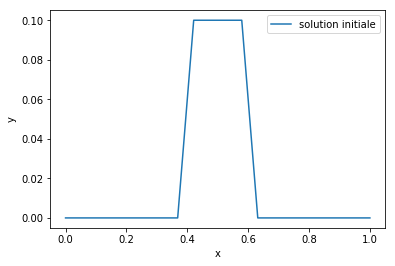

In [7]:
plt.plot(x,u0,label='solution initiale');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

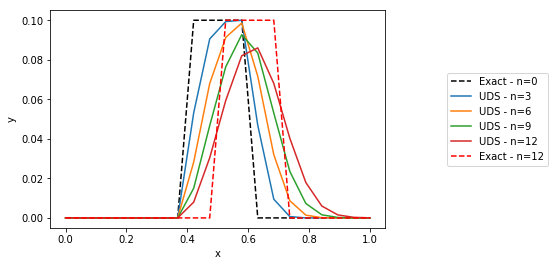

In [8]:
plt.plot(x,u0,label='Exact - n=0',color='black',linewidth=1.5,linestyle='dashed');
u = u0.copy()
for n in range(1,13):
    unp1 = upwind_Euler(u,dt,a,uds(u,x))
    u = unp1.copy()
    if n%3==0:
        plt.plot(x,u,label='UDS - n={0:d}'.format(n));

ue = define_rectangle(x,xs1+a*n*dt,xs2+a*n*dt)
plt.plot(x,ue,label='Exact - n={0:d}'.format(n),color='red',linewidth=1.5,linestyle='dashed');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5));

Le schéma du premier ordre est très mauvais et ajoute de la **dissipation numérique** : l'amplitude du signal diminue. Et le schéma centré ?

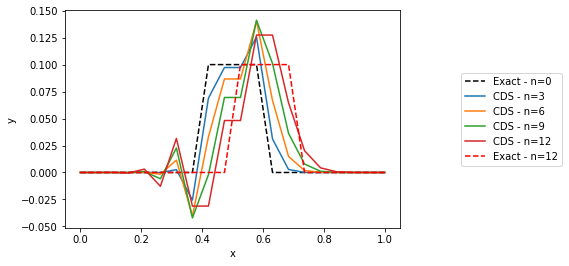

In [9]:
plt.plot(x,u0,label='Exact - n=0',color='black',linewidth=1.5,linestyle='dashed');
u = u0.copy()
for n in range(1,13):
    unp1 = upwind_Euler(u,dt,a,cds(u,x))
    u = unp1.copy()
    if n%3==0:
        plt.plot(x,u,label='CDS - n={0:d}'.format(n));

ue = define_rectangle(x,xs1+a*n*dt,xs2+a*n*dt)
plt.plot(x,ue,label='Exact - n={0:d}'.format(n),color='red',linewidth=1.5,linestyle='dashed');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5));

Aille c'est pire ! Il n'aime pas les gradients trop raides. On verra en TD qu'il n'est pas si pire en fait.

Pourquoi la solution se dégrade lorsque `nb_discr>100` ? Que représente le nombre calculé ci-dessous ? 

In [10]:
CFL = a * dt / dx
print('CFL = ',CFL)

CFL =  0.19


En TD on testera d'autres schémas, conditions initiales et on mesurera la convergence, les erreurs numériques des schémas.